# Data Scientist Associate Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
#### a. State whether the values match the description given in the table above.
#### b. State the number of missing values in the column.
#### c. Describe what you did to make values match the description if they did not match.

##### Answer
a. The values in the columns match the description given in the table above, with the following exceptions:
- There are 20 missing values in the "weight" column.
- Most of data types and missing value replacements match the given description, there are: 'booking_id', 'months_as_member', 'weight', 'day_of_week', 'time', 'category', 'attended'.
- The 'days_before' variable needs to remove the "days" characters before converting to a numberic data type to match with the given description.
- The "day_of_week" column should have 7 distinct types of days. However, in the dataset, there are 10 different types of days.

b. There are 20 missing values in the "weight" column.

c. Describe what you did to make values match the description if they did not match.
- To make the values in the "weight" column match the description, I fill the missing "weight" values with the calculated overall average weight.
- To make the values in the "days_before" column match the description, the values should have the "days" text removed before being converted to a numberic data type.
- To make the values in the "day_of_week" column match the desciption, I will replace all values "Monday" to "Mon" and "Wednesday" to "Wed" and "Fri." to "Fri"

In [29]:
import pandas as pd
import numpy as np

# Read file
df = pd.read_csv('fitness_class_2212.csv')

# Remove "days" characters from 'days_before'
df["days_before"] = df["days_before"].str.replace(' days',"")
df["days_before"] = df["days_before"].astype(np.int64)

# Fill and check 'weight'
weight_na = df["weight"].isna()
average_weight = df[~weight_na]['weight'].mean()
df['weight'].fillna(average_weight, inplace=True)
df['weight'] = df['weight'].apply(lambda x: max(x,40))

# Replace the "day_of_week" column from 10 different types of days to 7 distinct types of days
df["day_of_week"] = df["day_of_week"].str.replace('Monday','Mon')
df["day_of_week"] = df["day_of_week"].str.replace('Wednesday','Wed')
df["day_of_week"] = df["day_of_week"].str.replace('Fri.','Fri')

print("Dataset info:")
df.info()
print("")
print("Total null values in weight column ",df["weight"].isna().sum())
print("")
print("The distinct types of days ",df["day_of_week"].unique())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 93.9+ KB

Total null values in weight column  0

The distinct types of days  ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']


## Task 2
#### a. State which category of the variable attended has the most observations
#### b. Explain whether the observations are balanced across categories of the variable attended

##### Answer
In this task, I will add a new columns named "attended_label" to map the values of "attended" column with label

a. This visualization shows taht there ware about 1050 bookings that not attended the class and abot 450 bookings that attended the class. However, the most observations is "HIIT", with 454 bookings that did not attended and 213 booking that attended.

b. Overall, across all the categories, the attended counts are lower than the not attended counts. This indicates an imbalance in the observations with respect to the "attended" variables across the different activity categories. Balanced observations would mean that the attended and not attended counts are more evenly distributed among the categories, but in this case, attendance seems to be toward the "not attended" category for most activities.

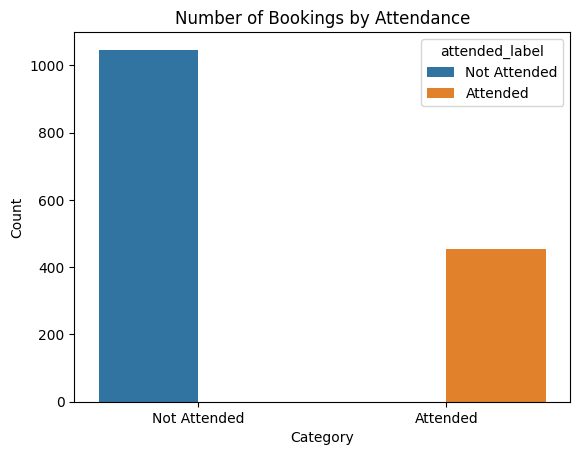

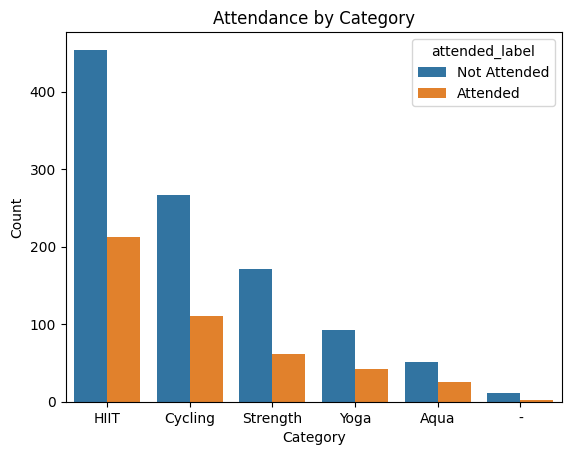

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map values for better labels
attended_mapping = {0: 'Not Attended', 1: 'Attended'}
df['attended_label'] = df['attended'].map(attended_mapping)

# Create a count plot number of booking by attendance
sns.countplot(data=df, x="attended_label", hue='attended_label')
plt.title("Number of Bookings by Attendance")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Create a count plot attendance by category
sns.countplot(data = df, x="category", hue="attended_label", order= df["category"].value_counts().index)
plt.title("Attendance by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

## Task 3: 
#### Describe the distribution of the number of months as a member. Your answer must include a visualization that shows the distribution.

##### Answer
1. Statistic:
- Total Months as Member: 1500 months
- Mean Months as Member: 15.63 months
- Median Months as Member: 12.00 months
- Minimum Months as Member: 1 month
- Maximum Months as Member: 148 months
- Standard Deviation: 12.93 months
2. Distribution:
- The histogram illustrates the frequency distribution of the 'months_as_member' variable. The x-axis represents the number of the months, and the y-axis represents the frequency of members falling with each range.
- This distribution is right-skewed because of the elongated tail on the right side of the histogram. Besides, the mean of the statistic tends to be greater then the median. This suggest that there are relatively few members who have been registed for an extended period.
- The majority of members have been part of the club for around 8 to 12 months, as evidenced by the peak in frequency within this range.
3. Visualization:
![Task3](Task3.PNG)

## Task 4
#### Describe the relationship between attendance and number of months as a member. Your answer must include a visualization to demonstrate the relationship.

##### Answer
1. Interpretation:
-  This stacked bar plot represents the relationship between attendance and membership duration.
-  The x-axis represents different ranges of membership duration (in months)
-  The y-axis represents the count of members
-  Each bar is divided into two segments: 0- 'Not Attended', 1- 'Attended'
2. Observations
- In general, members who have been part of the fitness class for a long period tend to exhibit a higher tendency to attend consistently.
-  Among members who enroll in the club within 1 to 6 months range, approximately 10 individuals participated in the class, while around 260 members did not attend. This discrepancy in proportions is approximately 26 times.
-  Regarding memberships within the 7-12 months, the data illustrates that the class was not attended by about 430 members, representing the highest proportions. Besides, the number of attending members increased to 80 during this duration.
-  The number of individuals not attending decrease gradually, while the count of attendees increases for members who have been part of the class for 13-24 months. The proportions of non-attendeess is approximately 20% higher than the attendees.
-  Among members with a membership durations of 25 months or more, there is a higher count of attendees compared to non-attendees. Furthermore, for those who have been memebers for more than 49 months, there are no instances of non-attendees.
3. Visualization:
![Task4](Task4.PNG)


## Task 5
#### The business wants to predict whether members will attend using the data provided. State the type of machine learning problem that this is (regression/ classification/ clustering).

##### Answer
In this scenario, Classification can support the business to predict whether members will attend or not. The goal is to predict the categorical class or label that an input data point belongs to, which is a binary catergorical outcome (1 for attended and 0 for not attended). Therefore, this problems falls under the classification category.

## Task 6
#### Fit a baseline model to predict whether members will attend using the data provided. You must include your code.

##### Answer
In this task, I'm using Logistic Regression as a common algorithm used for binary classification tasks. It's particulary suitable when the dependent variable is binary.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Define features (X) and target variable (y)
X = df.drop(['booking_id','attended',"attended_label"], axis=1)
y = df['attended']

# Perform one-hot encoding on categorical features
categorical_columns = ['day_of_week', 'time', 'category']
encoder = OneHotEncoder (drop='first', sparse=False)
transformer = encoder.fit_transform(X[categorical_columns])
X_encoded = pd.DataFrame(transformer)
X_encoded.columns = encoder.get_feature_names(categorical_columns)
X.drop(categorical_columns, axis=1, inplace=True)
X = pd.concat([X, X_encoded], axis=1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Calculate accuracy of the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print (f"Accuracy of Baseline Logistuc Regression: {accuracy_logreg:.2f}")

Accuracy of Baseline Logistuc Regression: 0.74


## Task 7
#### Fit a comparison model to predict whether members will attend using the data provided. You must include your code.

##### Answer
In this task, I am using Random Forest Classifier as a comparision model because it is an ensemble learning algorithm that consists of a collection of decision trees. Each tree is trained on a different subset of the data, and the final prediction is determined by aggregating the predictions of all individuals trees. Moreover, Random Forests can handle both classification and regression tasks.

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
random_forest = RandomForestClassifier(random_state=42)

# Fit the model on the training set
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest.predict(X_test)

# Calculate accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy of Comparison Model: {accuracy_rf:.2f}")

Accuracy of Comparison Model: 0.73


## Task 8
#### Explain why you chose the two models used in parts 6 and 7

##### Answer
- Logistic Regression: this algorithms is easy to understand how the model make predictions. It is also often used as a baseline model in classificaton tasks. It provides a straightforward benchmark for evaluating more complex models. Besides, Logistic regression is a good solution for binary classification problems, where the goal is predict one of two possible outcomes.
- Random Forest Classifier: this algorithms is an ensemble that combines multiple decision trees to improve predictive performance and reduce overfitting. Besides, it can handle more complexity patterns in the data and help identify the most influential features for making decistion. 

## Task 9
#### How can you compare between two models?

##### Answer
How can I compare the two models:
1. Data Preprocessing:Both models are trained and tested on the same preprocessed dataset to ensure a fair comparision.
2. Model Training and Hyperparamater Tuning: For both models, use appropriate hyperparameter values. Perform hyperparameter tuning for the Random Forest Classifier, which might involve tuning parameters like the number of trees and max depth.
3. Model Evaluation Metric: Using a combination of evaluation mretrics to comprehensively compare the models. Common metrics for binary classification task include: Accurate, Precistion, Recall, F1-score.
4. Cross-Validation: Perform k-fold cross-vadidation to assess the models' preformance acreoss multiple folds of the data. This helps to reduce the impact of random variations in the data.
5. Interpretability: Logistic Regression provides coeffcients that indicate the impact of each feature, while Random Forest's feature importance can help understand which features contribute most to predicts.
6. Overfitting: Check for signs of overfitting in both models. If one model is significantly overfitting, it might not generalize well to new data.

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compare the performance between the two algorithms
def compare(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {pre:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

# Logistic Regression
compare(y_test, y_pred_logreg, "Logistic Regression")

# Random Forest Classifier
compare(y_test, y_pred_rf, "Random Forest Classifier")

Model: Logistic Regression
Accuracy: 0.74
Precision: 0.78
Recall: 0.38
F1 score: 0.51
Model: Random Forest Classifier
Accuracy: 0.73
Precision: 0.69
Recall: 0.41
F1 score: 0.52


## Task 10
#### Explain which model performs better and why.

##### Answer
- Logistic Regression performs better in terms of accuracy, precision and F1 score while Random Forest has slight edge in recall. So in this case, Logistic Regression model is a better choice than the other.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam